# Exploratory Data Analysis for a Washington State Data Breach Database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# formatting for pandas to display the numbers pulled from the dataframe differently (keeps it from doing scientific notation)
pd.options.display.float_format = '{:.0f}'.format

In [3]:
wa_databreach_df = pd.read_csv("../data/wa_state_data_breaches.csv")
wa_databreach_df.head()

,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,...,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
0,03/28/2018 12:00:00 AM,04/11/2018 12:00:00 AM,Cyberattack,09/26/2017 12:00:00 AM,10/12/2017 12:00:00 AM,Delta Airlines,9561,Malware,24563,Business,...,100-199,0,183,183,False,16,167,False,14,1-99
1,03/28/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Cyberattack,09/26/2017 12:00:00 AM,10/12/2017 12:00:00 AM,"Best Buy Co, Inc.",9562,Malware,8390,Business,...,100-199,0,183,183,False,16,167,False,16,1-99
2,03/14/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Unauthorized Access,NaN,NaN,Inogen Inc.,9563,NaN,518,Health,...,Unknown,NaN,NaN,NaN,False,NaN,NaN,False,30,Unknown
3,03/15/2018 12:00:00 AM,04/24/2018 12:00:00 AM,Cyberattack,09/27/2017 12:00:00 AM,10/12/2017 12:00:00 AM,Sears Holdings,9565,Malware,2373,Business,...,100-199,0,169,169,False,15,154,False,40,1-99
4,03/29/2018 12:00:00 AM,04/26/2018 12:00:00 AM,Cyberattack,07/01/2017 12:00:00 AM,03/31/2018 12:00:00 AM,Hudson's Bay Company,9566,Malware,NaN,Business,...,200-299,2,271,273,True,273,NaN,False,28,200-299


In [4]:
wa_databreach_df.shape

(945, 24)

In [5]:
wa_databreach_df.describe()

,Id,WashingtoniansAffected,Year,YearText,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,DaysElapsedBeforeNotification
count,945,913,945,945,743,798,726,743,374,921
mean,11472,27155,2021,2021,6,144,149,114,79,86
std,1919,161263,2,2,27,298,271,227,209,91
min,9561,15,2016,2016,0,-281,0,0,1,0
25%,10259,846,2019,2019,0,4,7,3,13,30
50%,10517,1688,2021,2021,0,43,58,37,57,52
75%,13397,6209,2022,2022,0,160,180,103,81,106
max,15681,3243664,2024,2024,365,3728,3728,2240,3453,638


In [6]:
wa_databreach_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DateAware                          921 non-null    object 
 1   DateSubmitted                      945 non-null    object 
 2   DataBreachCause                    945 non-null    object 
 3   DateStart                          818 non-null    object 
 4   DateEnd                            760 non-null    object 
 5   Name                               945 non-null    object 
 6   Id                                 945 non-null    int64  
 7   CyberattackType                    610 non-null    object 
 8   WashingtoniansAffected             913 non-null    float64
 9   IndustryType                       945 non-null    object 
 10  BusinessType                       450 non-null    object 
 11  Year                               945 non-null    int64  

In [7]:
wa_databreach_df['CyberattackType'].unique()

array(['Malware', nan, 'Phishing', 'Skimmers', 'Ransomware', 'Other',
       'Unclear/unknown'], dtype=object)

In [8]:
wa_databreach_df['CyberattackType'].value_counts()

Ransomware         277
Malware            183
Phishing            71
Other               58
Skimmers            13
Unclear/unknown      8
Name: CyberattackType, dtype: int64

In [9]:
wa_databreach_df['DataBreachCause'].unique()

array(['Cyberattack', 'Unauthorized Access', 'Theft or Mistake'],
      dtype=object)

In [10]:
wa_databreach_df['DataBreachCause'].value_counts()

Cyberattack            668
Unauthorized Access    207
Theft or Mistake        70
Name: DataBreachCause, dtype: int64

In [11]:
wa_databreach_df.loc[: , ['DataBreachCause', 'CyberattackType']].sample(5)

,DataBreachCause,CyberattackType
181,Cyberattack,Unclear/unknown
29,Unauthorized Access,NaN
620,Unauthorized Access,NaN
134,Cyberattack,Skimmers
262,Cyberattack,Ransomware


Need to come back and change cyberattack, NaN to it's own category of unreported.

should be something like: 
```python
wa_databreach_df[[Cyberattack, NaN]] = wa_databreach_df[[Cyberattack, Unreported]]
```

In [12]:
# making the change to cyberattack DataBreachCause that are null in CyberattackType

wa_databreach_df.loc[:, 'CyberattackType'][(wa_databreach_df['DataBreachCause'] == 'Cyberattack') & (wa_databreach_df['CyberattackType'].isnull())] = 'Unreported'

wa_databreach_df.sample(10)

C:\Users\RGBMonster\AppData\Local\Temp\ipykernel_27288\753392825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_databreach_df.loc[:, 'CyberattackType'][(wa_databreach_df['DataBreachCause'] == 'Cyberattack') & (wa_databreach_df['CyberattackType'].isnull())] = 'Unreported'


,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,...,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
232,07/16/2020 12:00:00 AM,08/20/2020 12:00:00 AM,Cyberattack,02/07/2020 12:00:00 AM,05/20/2020 12:00:00 AM,UWM-Foundation,10254,Ransomware,1357,Non-Profit/Charity,...,100-199,0,160,160,False,103,57,False,35,100-199
293,07/17/2020 12:00:00 AM,09/23/2020 12:00:00 AM,Cyberattack,02/07/2020 12:00:00 AM,05/20/2020 12:00:00 AM,Point Loma Nazarene University,10320,Ransomware,1967,Education,...,100-199,0,161,161,False,103,58,False,68,100-199
416,04/05/2021 12:00:00 AM,04/28/2021 12:00:00 AM,Cyberattack,02/07/2020 12:00:00 AM,05/20/2020 12:00:00 AM,Direct Relief,10452,Ransomware,926,Non-Profit/Charity,...,400-499,0,423,423,False,103,320,False,23,100-199
37,11/13/2015 12:00:00 AM,03/04/2016 12:00:00 AM,Unauthorized Access,10/03/2015 12:00:00 AM,NaN,21st Century Oncology,9611,NaN,2802,Health,...,Unknown,NaN,41,NaN,False,NaN,NaN,False,112,Unknown
256,08/11/2020 12:00:00 AM,09/02/2020 12:00:00 AM,Cyberattack,02/07/2020 12:00:00 AM,05/20/2020 12:00:00 AM,University of North Dakota Alumni Association ...,10280,Ransomware,2687,Non-Profit/Charity,...,100-199,0,186,186,False,103,83,False,22,100-199
584,11/30/2020 12:00:00 AM,06/22/2021 12:00:00 AM,Unauthorized Access,09/01/2020 12:00:00 AM,02/28/2021 12:00:00 AM,Made In Oregon,10725,NaN,840,Business,...,100-199,90,90,180,True,180,NaN,False,204,100-199
706,01/02/2022 12:00:00 AM,05/03/2022 12:00:00 AM,Theft or Mistake,12/31/2021 12:00:00 AM,12/31/2021 12:00:00 AM,"Wells Fargo Bank, N.A.",13377,NaN,1511,Finance,...,1-99,0,2,2,False,0,2,False,121,0
204,07/16/2020 12:00:00 AM,08/13/2020 12:00:00 AM,Cyberattack,02/07/2020 12:00:00 AM,05/20/2020 12:00:00 AM,"Hearing, Speech & Deaf Center",10224,Ransomware,8441,Non-Profit/Charity,...,100-199,0,160,160,False,103,57,False,28,100-199
614,09/11/2021 12:00:00 AM,10/14/2021 12:00:00 AM,Unauthorized Access,09/11/2021 12:00:00 AM,09/11/2021 12:00:00 AM,The Public School and Education Employees Reti...,11125,NaN,532,Government,...,0,0,0,0,True,0,NaN,True,33,0
4,03/29/2018 12:00:00 AM,04/26/2018 12:00:00 AM,Cyberattack,07/01/2017 12:00:00 AM,03/31/2018 12:00:00 AM,Hudson's Bay Company,9566,Malware,NaN,Business,...,200-299,2,271,273,True,273,NaN,False,28,200-299


Need to make a function that changes all date columns to a simple year/month/day, since time is all the same and therefore arbitrary in this case.

In [13]:
# More db refining

# wa_databreach_df = wa_databreach_df.drop('Id', axis = 1)
# wa_databreach_df = wa_databreach_df.drop('YearText', axis = 1)
# wa_databreach_df = wa_databreach_df.drop('Year', axis = 1)

wa_databreach_df['DateStart'] = pd.to_datetime(wa_databreach_df['DateStart']).dt.date   #format="%m/%d/%Y", exact=False)
wa_databreach_df



,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,...,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
0,03/28/2018 12:00:00 AM,04/11/2018 12:00:00 AM,Cyberattack,2017-09-26,10/12/2017 12:00:00 AM,Delta Airlines,9561,Malware,24563,Business,...,100-199,0,183,183,False,16,167,False,14,1-99
1,03/28/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Cyberattack,2017-09-26,10/12/2017 12:00:00 AM,"Best Buy Co, Inc.",9562,Malware,8390,Business,...,100-199,0,183,183,False,16,167,False,16,1-99
2,03/14/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Unauthorized Access,NaT,NaN,Inogen Inc.,9563,NaN,518,Health,...,Unknown,NaN,NaN,NaN,False,NaN,NaN,False,30,Unknown
3,03/15/2018 12:00:00 AM,04/24/2018 12:00:00 AM,Cyberattack,2017-09-27,10/12/2017 12:00:00 AM,Sears Holdings,9565,Malware,2373,Business,...,100-199,0,169,169,False,15,154,False,40,1-99
4,03/29/2018 12:00:00 AM,04/26/2018 12:00:00 AM,Cyberattack,2017-07-01,03/31/2018 12:00:00 AM,Hudson's Bay Company,9566,Malware,NaN,Business,...,200-299,2,271,273,True,273,NaN,False,28,200-299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,05/30/2023 12:00:00 AM,08/25/2023 12:00:00 AM,Unauthorized Access,2023-05-27,05/31/2023 12:00:00 AM,"Maximus, Inc.",15654,NaN,23374,Business,...,1-99,1,3,4,True,4,NaN,False,87,1-99
941,06/09/2023 12:00:00 AM,09/25/2023 12:00:00 AM,Cyberattack,2023-06-09,NaN,Spinal and Sports Care Clinic,15676,Ransomware,1089,Health,...,Unknown,NaN,0,NaN,False,NaN,NaN,False,108,Unknown
942,06/04/2023 12:00:00 AM,09/25/2023 12:00:00 AM,Unauthorized Access,NaT,NaN,Data Media Associates,15677,NaN,657,Business,...,Unknown,NaN,NaN,NaN,False,NaN,NaN,False,113,Unknown
943,05/31/2023 12:00:00 AM,09/22/2023 12:00:00 AM,Cyberattack,2023-05-30,05/31/2023 12:00:00 AM,Financial Institution Service Corporation,15681,Other,2140,Finance,...,1-99,0,1,1,True,1,NaN,True,114,1-99


In [14]:
# Filter for non-NaN values in Washingtonians affected and make a histplot for distribution

nonanmask = wa_databreach_df['WashingtoniansAffected'].notnull()
affected_only = wa_databreach_df[nonanmask]['WashingtoniansAffected']
affected_only = affected_only.sort_values()
print(affected_only.to_string())

32         15
21        500
257       500
114       501
444       502
741       505
351       505
335       505
474       506
406       507
423       511
55        511
73        512
115       513
153       515
524       516
466       516
298       516
716       518
2         518
470       518
911       519
521       519
737       521
691       521
357       522
374       523
136       523
97        524
196       526
103       526
192       527
756       531
702       531
614       532
483       532
516       533
359       534
839       534
870       535
441       536
299       537
502       540
381       540
117       541
759       541
808       542
40        544
868       545
912       545
776       546
228       548
885       549
69        549
327       552
720       554
308       555
71        556
84        558
833       559
380       560
829       561
767       563
264       564
38        566
574       566
645       568
311       569
825       571
865       573
891       573
493   

In [15]:
plot_affectedonly = affected_only[(affected_only < 5000) & (affected_only > 15)]
plot_affectedonly

21     500
257    500
114    501
444    502
741    505
      ... 
478   4899
377   4900
893   4902
324   4984
447   4996
Name: WashingtoniansAffected, Length: 657, dtype: float64

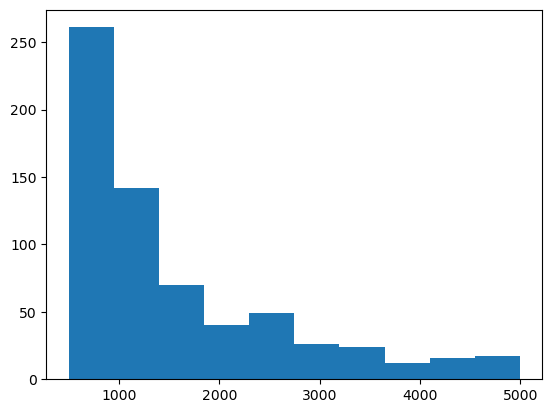

In [16]:
fig, ax = plt.subplots()

ax.hist(plot_affectedonly)
ax.ticklabel_format(style='plain')

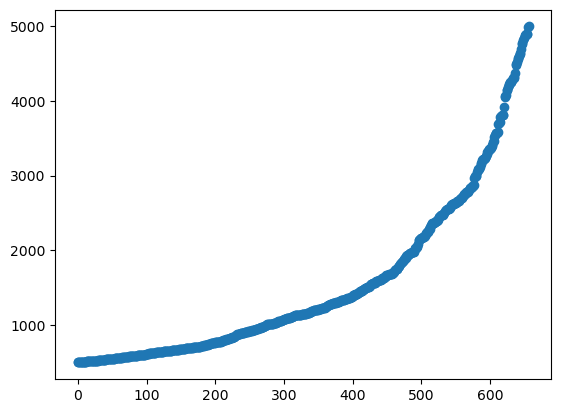

In [17]:
fig, ax = plt.subplots()

ax.scatter(range(len(plot_affectedonly)),plot_affectedonly)
ax.ticklabel_format(style='plain')

In [18]:
biggestbreaches = wa_databreach_df[wa_databreach_df['WashingtoniansAffected'] > 500000].sort_values(by='WashingtoniansAffected')
biggestbreaches[['Name','WashingtoniansAffected']]

,Name,WashingtoniansAffected
873,CommonSpirit Health,582285
621,Sea Mar Community Health Centers,628569
123,Washington State University,769088
858,T-Mobile USA,772593
902,"Neopets, Inc.",788415
233,Boy Scouts of America,981068
368,Washington State Auditor's Office,1420520
64,ACTIVEOutdoors,1449645
602,T-Mobile USA,2079648
141,"Equifax, Inc.",3243664


Note to self, make a function that will grab value counts from a given column.

maybe even take an argument that will choose the type of plot and plot it for you.

then save the image.

In [19]:
cybattcktype = wa_databreach_df['CyberattackType'].value_counts()
cybattcktype

Ransomware         277
Malware            183
Phishing            71
Unreported          61
Other               58
Skimmers            13
Unclear/unknown      8
Name: CyberattackType, dtype: int64

In [20]:
disinprog = wa_databreach_df['DiscoveredInProgress'].value_counts()
disinprog

False    576
True     369
Name: DiscoveredInProgress, dtype: int64

In [21]:
industype = wa_databreach_df['IndustryType'].value_counts()
industype

Business              446
Health                151
Finance               135
Non-Profit/Charity     97
Education              78
Government             38
Name: IndustryType, dtype: int64

In [22]:
bustype = wa_databreach_df['BusinessType'].value_counts()
bustype

Retail                   96
Other                    79
Hospitality              41
Manufacturing            25
Professional Services    25
Software                 21
Consumable               19
Clothing                 18
Entertainment            15
Legal                    15
Construction             13
Transportation           12
Human Resources           8
Telecommunications        8
Web Services              8
Accessories               8
Cosmetic                  8
Shipping                  7
Real Estate               6
Home                      6
Fitness                   6
Cleaning                  3
Cryptocurrency            2
Biotech                   1
Name: BusinessType, dtype: int64

In [23]:
datbreachcause = wa_databreach_df['DataBreachCause'].value_counts()
datbreachcause

Cyberattack            668
Unauthorized Access    207
Theft or Mistake        70
Name: DataBreachCause, dtype: int64

Text(0.5, 1.0, 'How often were attacks discovered while they were happening?')

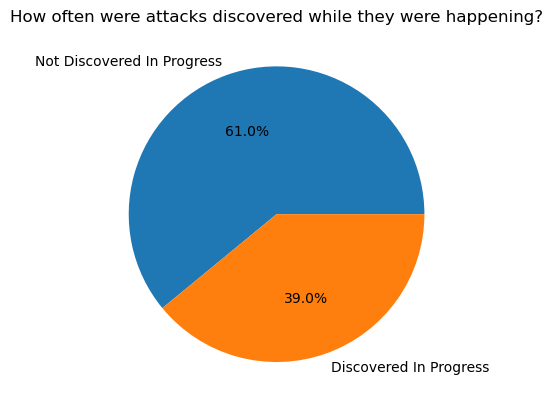

In [24]:
fig, ax = plt.subplots()

ax.pie(disinprog.values, labels=['Not Discovered In Progress','Discovered In Progress'], autopct='%1.1f%%')
ax.set_title('How often were attacks discovered while they were happening?')

Text(0.5, 1.0, 'Types of Cyber Attacks')

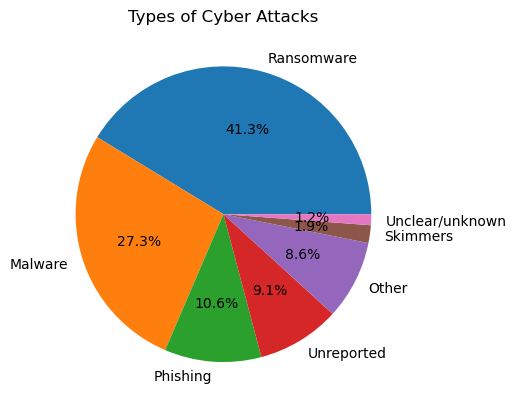

In [25]:
fig, ax = plt.subplots()

ax.pie(cybattcktype.values, labels=cybattcktype.index, autopct='%1.1f%%')

ax.set_title('Types of Cyber Attacks')

Text(0.5, 1.0, 'Industries Most Affected')

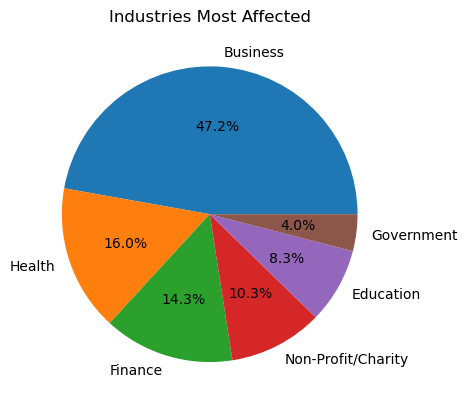

In [26]:
fig, ax = plt.subplots()

ax.pie(industype.values, labels=industype.index, autopct='%1.1f%%')

ax.set_title('Industries Most Affected')

Text(0.5, 1.0, 'Businesses Most Affected')

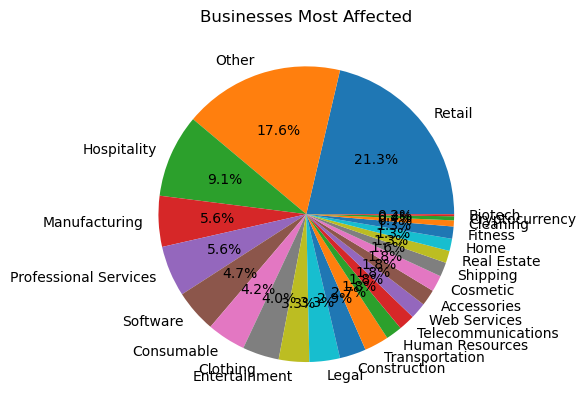

In [27]:
# Maybe try a bar for this one, or try resizing the labels and changing things around.

fig, ax = plt.subplots()

ax.pie(bustype.values, labels=bustype.index, autopct='%1.1f%%')

ax.set_title('Businesses Most Affected')

Text(0.5, 1.0, 'Data Breach Causes')

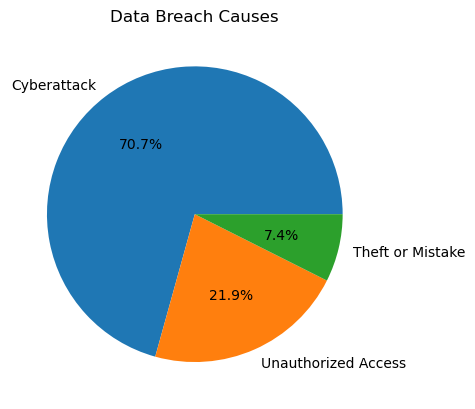

In [28]:
fig, ax = plt.subplots()

ax.pie(datbreachcause.values, labels=datbreachcause.index, autopct='%1.1f%%')

ax.set_title('Data Breach Causes')

Figure out how to fix the x labels on this scatter plot...

Also, plot 2020-02-07 on its own and take a look at (what appears to be) a large coordinated ransomware attack.

In [34]:
plotdates = wa_databreach_df.groupby('DateStart').count()
plotdates_notfebsev = plotdates[plotdates['Name'] < 108]

plotdates_notfebsev.index


Index([2008-04-01, 2010-08-25, 2011-12-01, 2013-06-01, 2013-10-23, 2013-11-15,
       2013-12-23, 2014-01-22, 2014-02-19, 2014-05-04,
       ...
       2023-04-25, 2023-05-27, 2023-05-28, 2023-05-29, 2023-05-30, 2023-05-31,
       2023-06-09, 2023-06-14, 2023-06-29, 2023-07-11],
      dtype='object', name='DateStart', length=570)

C:\Users\RGBMonster\AppData\Local\Temp\ipykernel_27288\1489270031.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65, fontsize=10)


[Text(13149.0, 0, '2006'),
 Text(13879.0, 0, '2008'),
 Text(14610.0, 0, '2010'),
 Text(15340.0, 0, '2012'),
 Text(16071.0, 0, '2014'),
 Text(16801.0, 0, '2016'),
 Text(17532.0, 0, '2018'),
 Text(18262.0, 0, '2020'),
 Text(18993.0, 0, '2022'),
 Text(19723.0, 0, '2024')]

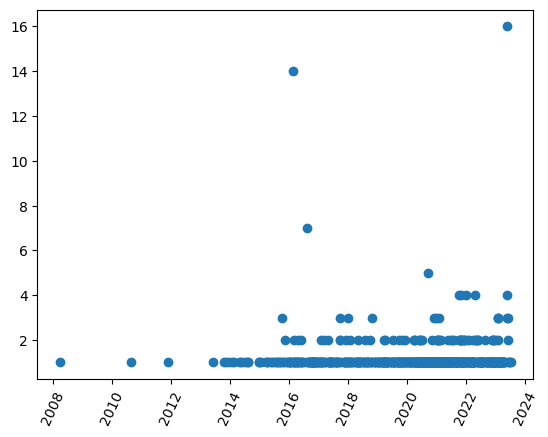

In [42]:

fig,ax = plt.subplots()

ax.scatter(plotdates_notfebsev.index, plotdates_notfebsev['Name'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=65, fontsize=10)
# ax.set_xticklabels(rotation=65, fontsize=10)

In [43]:
wa_databreach_df['DateStart'].value_counts()

type(plotdates_notfebsev.index[3])

datetime.date

In [32]:
dtsv = dt.date(2020,2,7) # dtsv is date to search variable

onebigx = wa_databreach_df[wa_databreach_df['DateStart']==dtsv][['Name','CyberattackType', 'WashingtoniansAffected']]
onebigx

,Name,CyberattackType,WashingtoniansAffected
187,French American School of Puget Sound,Ransomware,3172
189,Auburn University,Ransomware,1294
190,George W. Bush Presidential Center,Ransomware,6797
191,"Americares Foundation, Inc.",Ransomware,2444
194,Cancer Research Institute,Ransomware,1312
...,...,...,...
356,North Park University,Ransomware,1239
359,Helen Keller International,Ransomware,534
402,Marines' Memorial Association & Foundation,Ransomware,2625
416,Direct Relief,Ransomware,926


In [33]:
plotdates_notfebsev

,DateAware,DateSubmitted,DataBreachCause,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,BusinessType,...,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
DateStart,,,,,,,,,,,,,,,,,,,,,
2008-04-01,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2010-08-25,1,1,1,0,1,1,1,1,1,0,...,1,0,1,0,1,0,0,1,1,1
2011-12-01,0,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,0,1,0,1
2013-06-01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2013-10-23,1,1,1,1,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,2,2,2,2,2,2,1,2,2,0,...,2,2,2,2,2,2,2,2,2,2
2023-06-09,1,1,1,0,1,1,1,1,1,0,...,1,0,1,0,1,0,0,1,1,1
2023-06-14,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
